# A3: Visualization for Exploratory Data Analysis

* [Exploratory real estate data analysis](#EDA)
* [Submission](#Submission)

## Background and Objective

Effective use of graphs as visual representations of data is an important skill for a data scientist. [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf) gave you an introduction to principles of visualization design. In this assignment we will apply these principles when working with real-estate data.

After completing this assignment, you should be able to use, create, and improve data plots to make them effective tools to find and carry messages from your data.
We will perform visual data analysis using Python and gain experience with geospatial data.

### Further reading

**Stephen Few, "Show me the numbers - Designing Tables and Graphs to Enlighten", (2nd Ed.), Analytics Press, 2012**

In addition to the reference given in the lecture, Stephen Few's book "Show me the Numbers" is an excellent source on the principles of visual design for data analysis. Chapter 6 shows which types of graphs are suitable for different types of data and questions. Note that *marks* are called *value-encoding objects*.

As further motivating example of how visualization can bring data to life and clear up misconceptions, consider to watch [Hans Rosling's famous TED talks](https://www.ted.com/playlists/474/the_best_hans_rosling_talks_yo), e.g. "The best stat's you've ever seen" from 2006.

### Lab environment

As with A1 and A2, the conda environment in the lab at location
`/usr/shared/CMPT/big-data/condaenv/gt`
has all dependencies for this assignment installed.

## Real Estate EDA

**Real estate data**

Imagine you are a data scientist working at a real-estate company. In this week, your job is to analyze Vancouver housing prices. First, inspect the dataset provided in [property_tax_report_2021.zip](property_tax_report_2021.zip). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2021.
You can find the schema information of the dataset from the [Vancouver Open Data Portal](https://opendata.vancouver.ca/explore/dataset/property-tax-report/information/).
Familiarize yourself with the context and background info on that page before diving deeper into Exploratory Data Analysis.

We first load the data as a DataFrame. To make this analysis more interesting, we will add two new columns to the data: `CURRENT_PRICE` represents the property price in 2021; `PREVIOUS_PRICE` represents the property price in 2020.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
def displaymd(mdstr):
    display(Markdown(mdstr))

In [2]:

# use this in case you have a hidpi display and figures appear blurry
#%config InlineBackend.figure_format = 'retina'

# before running this, unzip the provided data
df = pd.read_csv("data/property_tax_report_2021.csv", sep=';')

df['CURRENT_PRICE'] = df.apply(lambda x: x['CURRENT_LAND_VALUE']+x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df['PREVIOUS_PRICE'] = df.apply(lambda x: x['PREVIOUS_LAND_VALUE']+x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

Now let's start the EDA process. 

**Hint.** For some of the following questions, we provided an example plot (see [link](https://rawgit.com/sfu-db/bigdata-cmpt733/master/Assignments/A3/A3-plots.html)). But note that you do not have to use the same plot design. In fact, we didn't do a good job to follow the *Principles of Visualization Design* in the second half of the slides of [Lecture 3](https://sfu-db.github.io/bigdata-cmpt733/Lectures/lec3.pdf), please review this part by yourself.
You should think about how to correct the bad designs in my plots.

### Question 1. Look at some example rows
Print the first five rows of the data:

In [3]:
# --- Write your code below ---
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONING_DISTRICT,ZONING_CLASSIFICATION,LOT,PLAN,BLOCK,DISTRICT_LOT,...,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
0,002-582-759,STRATA,90717090036,9071709,CD-1 (94),Comprehensive Development,36,VAS452,NaN,526,...,2021.0,1015000.0,115000.0,1977.0,1977.0,3644.37,4,2021,1247000.0,1130000.0
1,010-772-278,LAND,692077380000,69207738,RS-1,One-Family Dwelling,22,VAP6923,511,526,...,2021.0,2759000.0,463000.0,1991.0,1991.0,12528.80,4,2021,3421000.0,3222000.0
2,009-746-986,LAND,79715270000,7971527,RS-1,One-Family Dwelling,8,VAP9119,560,526,...,2021.0,2958000.0,278000.0,1955.0,1975.0,11602.60,4,2021,3488000.0,3236000.0
3,008-199-809,LAND,742030860000,74203086,RS-5,One-Family Dwelling,12,VAP5959,18,2027,...,2021.0,3204000.0,521000.0,1989.0,1989.0,15046.20,3,2021,3920000.0,3725000.0
4,004-429-435,LAND,723032140000,72303214,RS-5,One-Family Dwelling,32,VAP4499,60,2027,...,2021.0,2720000.0,256000.0,1986.0,1986.0,11135.00,3,2021,3122000.0,2976000.0


### Question 2. Get summary statistics

From the above output, you will know that the data has 28 columns. Please use the describe() function to get the summary statistics of each column.
Also, to improve readability use a pandas [DataFrame Styler](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) to format the numbers without scientific notation (i.e. no floating point exponent).

In [4]:
# --- Write your code below ---
des_df = df.describe(include=None, exclude=None, percentiles=None)
des_df.style.format(precision=2)

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE,REPORT_YEAR,CURRENT_PRICE,PREVIOUS_PRICE
count,650847.00,650847.00,649178.00,642149.00,642149.00,642149.00,634890.00,634890.00,622538.00,622538.00,426393.00,650847.00,650847.00,642149.00,634890.00
mean,498730471748.25,49873047.17,2381.41,1709920.16,436542.00,2021.01,1714975.90,408908.72,1983.35,1990.93,8356.72,16.54,2021.01,2146462.15,2123884.61
std,249280578035.74,24928057.81,1989.22,9876736.00,4424333.36,0.82,9868571.45,4087834.81,29.63,19.49,57341.15,8.95,0.82,12132261.01,11923651.16
min,19632060000.00,1963206.00,1.00,0.00,0.00,2020.00,0.00,0.00,1800.00,200.00,0.00,1.00,2020.00,0.00,0.00
25%,210710030034.00,21071003.00,939.00,481000.00,101000.00,2020.00,480000.00,97200.00,1972.00,1980.00,1911.31,9.00,2020.00,669000.00,664000.00
50%,612275650000.00,61227565.00,1777.00,956000.00,193000.00,2021.00,963000.00,186000.00,1993.00,1994.00,3926.26,16.00,2021.00,1183000.00,1178000.00
75%,690033505000.00,69003350.50,3336.00,1576000.00,317000.00,2022.00,1516000.00,305000.00,2005.00,2005.00,6589.01,25.00,2022.00,1872000.00,1803000.00
max,845313420000.00,84531342.00,31888.00,3488433000.00,693426000.00,2022.00,3165054000.00,652775000.00,2019.00,2019.00,8621182.00,30.00,2022.00,3496582000.00,3172855000.00


Please look at the above output carefully, and make sure that you understand the meanings of each row (e.g., std, 25% percentile).

### Question 3. Examine missing values

Now we are going to perform EDA on a single column (i.e., univariate analysis). We chose `YEAR_BUILT`, which represents in which year a property was built.  We first check whether the column has any missing value. 

In [5]:
# --- Write your code below ---
# Print the percentage of the rows whose YEAR_BUILT is missing.
nan_num = df['YEAR_BUILT'].isna().sum()
nan_per = nan_num/(len(df))
print('Missing Value: {:.2%}'.format(nan_per))

Missing Value: 4.35%


Missing values are very common in real-world datasets. In practice, you should always be aware of the impact of the missing values on your downstream analysis results.

### Question 4.  Plot a line chart

We now start investigating the values in the `YEAR_BUILT` column.  Suppose we want to know: "How many properties were built in each year (from 1990 to 2018)?" Please plot a line chart to answer the question.

Text(0.5, 1.0, 'How many properties were built in each year from 1900 to 2018')

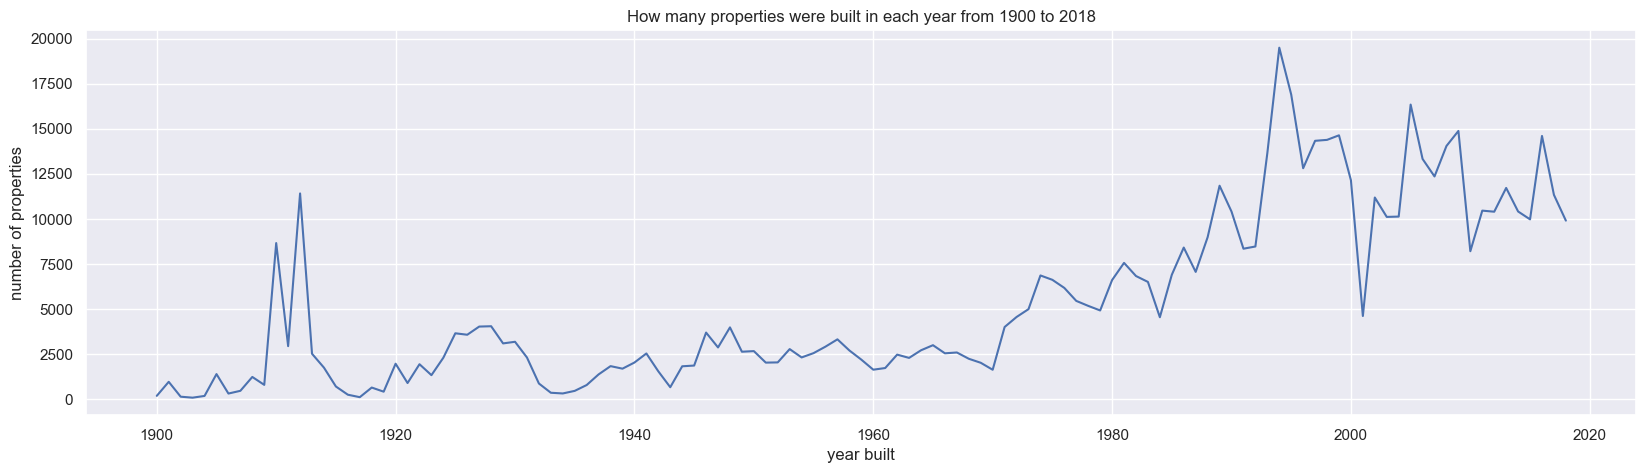

In [6]:
# --- Write your code below ---
built_year = df[df['YEAR_BUILT'].map(lambda x: x>=1900 and x<=2018)].groupby(by = ['YEAR_BUILT'],as_index=False)['PID'].count()
built_year.columns = ['year built', 'number of properties']

sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
ax = sns.lineplot(data = built_year, x='year built', y='number of properties')
ax.set_title('How many properties were built in each year from 1900 to 2018',fontsize = 12)
# ax.set_xticks(range(1990, 2019))


Please write down the **two** most interesting findings that you draw from the plot. For example, you can say: <font color='blue'>"Vancouver has about 6300 properties built in 1996 alone, which is more than any other year"</font>.

**Findings**
1. From 1900 to 2020, the total built properties have a increasing trend.
2. From 1994 to 2001, there was a continuous downward trend in building new properties, which reflects Canada's deep recession in the 1990s.

### Question 5. Plot a bar chart

Next, we want to find that, between 1900 and 2021, which years have the most number of properties been built? Plot a bar chart to show the top 20 years. 

Text(0.5, 1.0, 'Top 20 years of number of new built properties from 1900 and 2021')

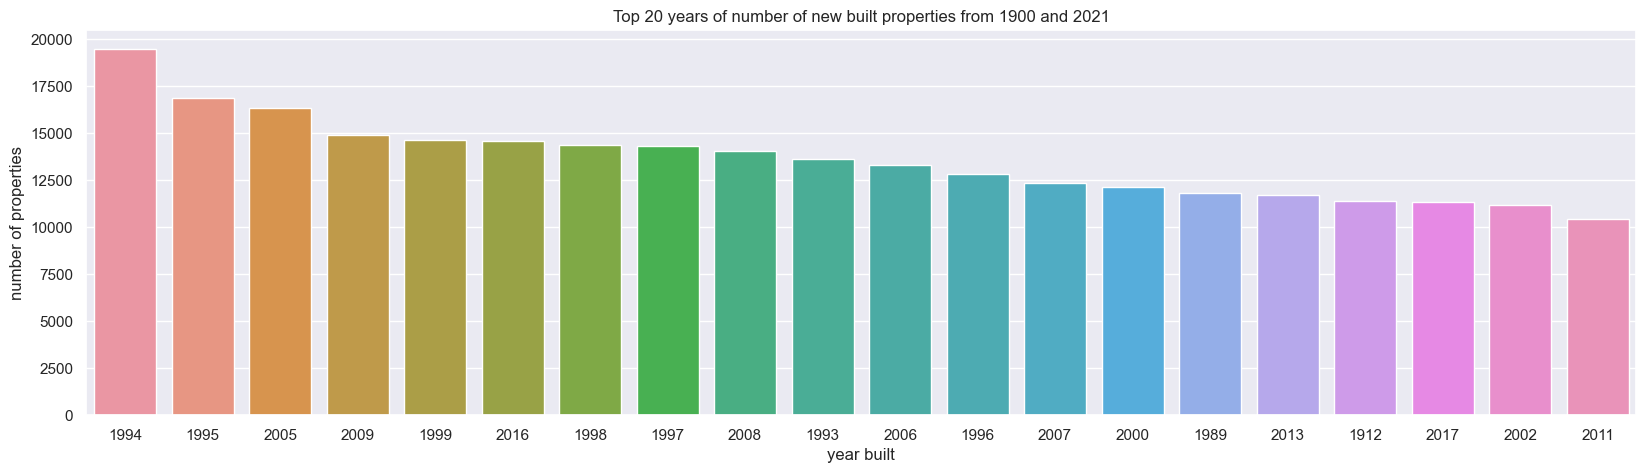

In [7]:
# --- Write your code below ---
built_year = df[df['YEAR_BUILT'].map(lambda x: x>=1900 and x<=2021)].groupby(by = ['YEAR_BUILT'],as_index=False)['PID'].count()
built_year.columns = ['year built', 'number of properties']
sort_built = built_year.sort_values(['number of properties'], ascending= False).head(20)
sort_built['year built'] = sort_built['year built'].apply(lambda x: int(x))
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=sort_built, x = 'year built', y='number of properties', order = sort_built['year built'])
ax.set_title('Top 20 years of number of new built properties from 1900 and 2021',fontsize = 12)

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Consecutive years from 1993 to 2020 appear on the plot. 
2. The earliest year that appears in the plot is 1912, and the closest year to it is 1989, which is 77 years later.

### Question 6. Plot a histogram

What's the distribution of the number of properties built between 1900 and 2020? Please plot a histogram to answer this question.

Text(0.5, 1.0, 'Histogram of number of new properties from 1900 to 2020')

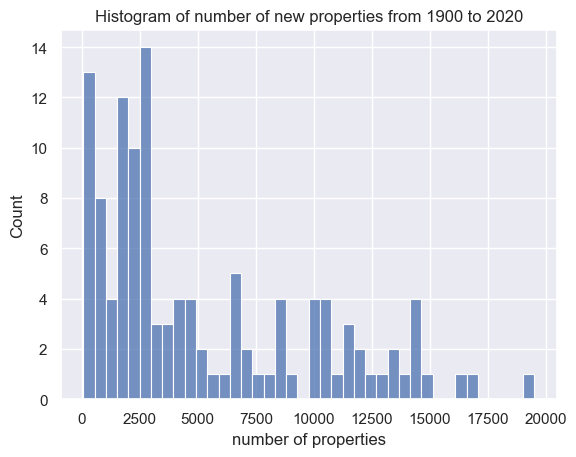

In [8]:
# --- Write your code below ---
built_year = df[df['YEAR_BUILT'].map(lambda x: x>=1900 and x<=2020)].groupby(by = ['YEAR_BUILT'],as_index=False)['PID'].count()
built_year.columns = ['year built', 'number of properties']
ax = sns.histplot(data = built_year, x='number of properties', bins=40)
ax.set_title('Histogram of number of new properties from 1900 to 2020')

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. Most number lies around 2500, which are the most common number of new properties from 1900 to 2020.
2. There are outliars in the plot, which are around 17500 and 20000, only 3 years of new properties are above these numbers.

### Question 7. Make a scatter plot

Suppose we are interested in those years which built more than 2000 properties. Make a scatter plot to examine whether there is a relationship between the number of built properties and the year?

Text(0.5, 1.0, 'Scatter plot of number of new properties above 2000 and its built year')

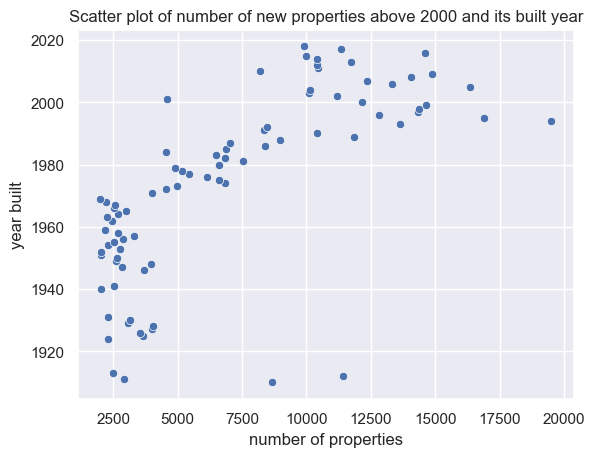

In [9]:
# --- Write your code below ---
built_year = df[df['YEAR_BUILT'].map(lambda x: x>=1900 and x<=2020)].groupby(by = ['YEAR_BUILT'],as_index=False)['PID'].count()
built_year.columns = ['year built', 'number of properties']
built_year = built_year[built_year['number of properties'].map(lambda x: x>2000)]
built_year

ax = sns.scatterplot(data=built_year, x = 'number of properties', y = 'year built')
ax.set_title('Scatter plot of number of new properties above 2000 and its built year')

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. There is a log like relationship between number of properties and the year they built.
2. Between year 1900 to 1970, the number of new properties stay around 2500.

### Step 8. Obtain geographic coordinates for Canadian postal codes

The property data carries Canadian postal codes, but latitude/longitude coordinates would be much more useful. Unfortunately, geolocations of Canadian postal codes are protected by copyright and the information has to be purchased. Fortunately, you already paid for it with your tuition...

Statistics Canada has a protected dataset, the postal code conversion file, which is available to SFU students via the Abacus Dataverse. Please follow these steps:
* Have a valid SFU account (not sure if alumni account would work)
* Connect to the Abacus Data Network via https://databases.lib.sfu.ca/record/61245148090003610/Abacus-Data-Network
* Connecting via the above link should show you as logged in user at https://abacus-library-ubc-ca.proxy.lib.sfu.ca/
* Search for: **Postal Code Conversion File May 2021**
* Download files: **pccfNat_fccpNat_052021.txt** and the [2021 PCCF Guide .pdf](https://abacus.library.ubc.ca/file.xhtml?persistentId=hdl:11272.1/AB2/9J8YUH/WJHERN&version=1.0) and place them in the same folder as this notebook.

#### Details about the dataset in the 2021 PCCF Guide
* Description of available fields for each postal code, see Content section, pp. 9
* Offsets and Size of fields to extract from lines in Postal Code Conversion File, Table 4.1, p. 11.  
  This is also included along with this notebook as **pccf_record_layout.csv**

In [10]:
rldf = pd.read_csv('pccf_record_layout.csv')
# load the raw text pccf file
with open('pccfNat_fccpNat_052021.txt','r', encoding='latin-1') as fh:
    pctxt = fh.read()
pclines = pctxt.split('\n')
pclines = list(filter(lambda l: len(l), pclines)) # keep only non-empty lines
displaymd(f"Number of lines in PCCF: {len(pclines):,}")

pclines = pd.Series(pclines)

Number of lines in PCCF: 1,742,403

The following extraction of substrings works, but is *very slow*. Please use [pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods) to make this faster.  
**TODO** write your improved code here.

In [11]:
# TODO: rewrite this function to make it run in about a minute (or just maybe 17 sec)
def gen_pccf():
	def row_slice():
		res = pclines.str[r['Position']-1:r['Position']+r['Size']-1]
		return res
	for idx, r in rldf.iterrows():
		print(idx, r['Field name'])
		# yield r['Field name'], list(row_slice())
		yield r['Field name'], list(row_slice())
pccf_df = pd.DataFrame(dict(gen_pccf()))
print(len(pccf_df))

0 Postal code
1 FSA
2 PR
3 CDuid
4 CSDuid
5 CSDname
6 CSDtype
7 CCScode
8 SAC
9 SACtype
10 CTname
11 ER
12 DPL
13 FED13uid
14 POP_CNTR_RA
15 POP_CNTR_RA_type
16 DAuid
17 Dissemination block
18 Rep_Pt_Type
19 LAT
20 LONG
21 SLI
22 PCtype
23 Comm_Name
24 DMT
25 H_DMT
26 Birth_Date
27 Ret_Date
28 PO
29 QI
30 Source
31 POP_CNTR_RA_SIZE_CLASS
1742403


In [12]:
pccf_df['LAT'] = pccf_df['LAT'].astype(float)
pccf_df['LONG'] = pccf_df['LONG'].astype(float)
pccf_short = pccf_df[['Postal code', 'LONG', 'LAT', 'CSDname']]
pccf_short = pccf_short.groupby('Postal code').agg({'LONG':'mean','LAT':'mean','CSDname':'first'})

# pccf_short

Phew, that was tedious! But now we're ready to merge geolocation to our property data.

In [13]:
df['Postal code'] = df['PROPERTY_POSTAL_CODE'].str.replace(' ','')
dfgeo = df.merge(pccf_short, on='Postal code')

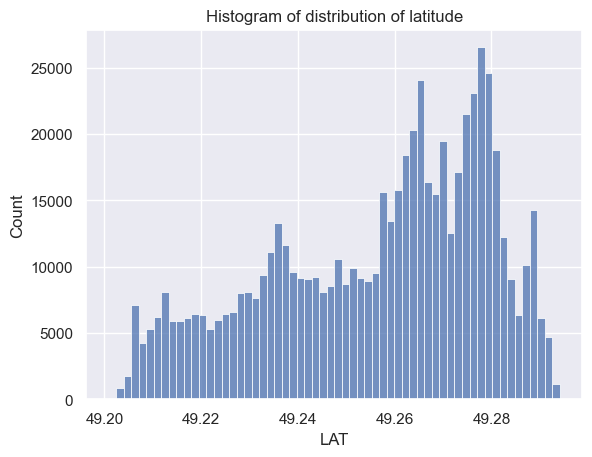

In [14]:
# TODO remove the properties that are further north, outside Vancouver proper.
# Use a suitable visualiation to decide the right cutoff.

#Use histgram to show the distribution of Longtitudes
#The central Vancouver is 49.246 to 49.26
ax = sns.histplot(data = dfgeo, x='LAT', bins=60)
ax.set_title('Histogram of distribution of latitude')
# --- write your code here ---
#There is no clear outliers in the distribution plot, so there is no need to do cutoff.
dfgeo_van = dfgeo

Feel free to use the function below to prepare a heatmap of averages. The code is based on [Matthew McGonagle's blog post](https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins).

In [15]:
def heatmap_bins(data, fieldsxy, ncuts=30, aggarg='mean'):
    """Perform data.groupby using bin cuts along columns named in fieldsxy.
    Args:
        data     - pandas dataframe
        fieldsxy - list of column names along which to perform binned groupby
        ncuts    - number of cuts to perform for each field (see pd.cut)
        aggarg   - aggregation operation to perform, default: 'mean'
    Returns:
        grouped dataframe, ready for plotting via sns.heatmap(means['COLUMNAME'])
    """
    # based on: https://matthewmcgonagle.github.io/blog/2019/01/22/HeatmapBins
    cuts = pd.DataFrame({str(feature) + ' bins' : pd.cut(data[feature], ncuts) for feature in fieldsxy})
    means = data.join(cuts).groupby( list(cuts) ).agg(aggarg)
    means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.
    # Reverse the order of the rows as the heatmap will print from top to bottom.
    means = means.iloc[::-1]
    return means

**TODO** plot a heatmap of average current property prices, within the same geographic area

Note that the colormap may be useless due to a few extreme values. Rather than removing them as 'outliers', please just map the values before drawing with a suitable choice of logarithm.

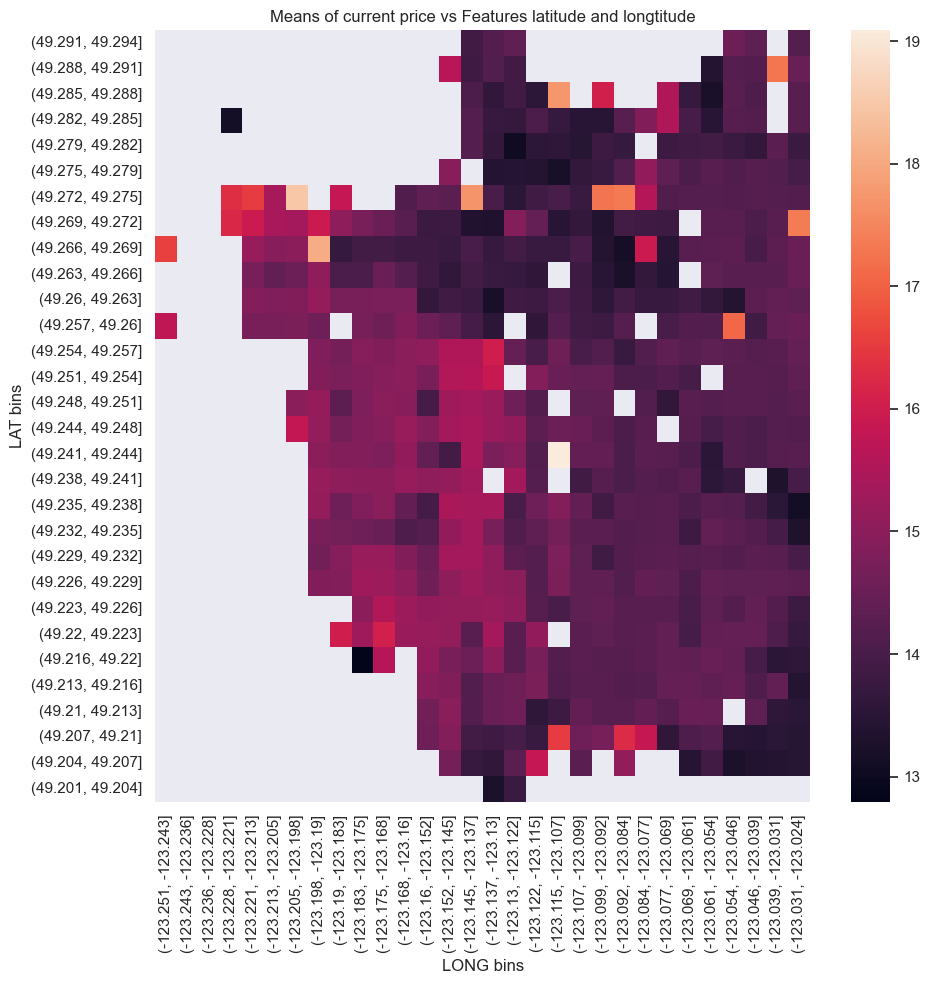

In [16]:
field = 'CURRENT_PRICE'
dfgeo_van[field] = dfgeo_van[field].apply(np.log)
dfgeo_van
means = heatmap_bins(dfgeo_van, ['LONG', 'LAT'])

with plt.rc_context({'figure.figsize': (10,10)}):
    #Cut the latitude and longtitude into n parts
    plt.clf()
    sns.heatmap(means[field]) 
    plt.title('Means of current price vs Features latitude and longtitude')
    plt.tight_layout()
    # plt.savefig('graphs/means1.svg')
    plt.show()
# plt.xticks([], []);
# plt.yticks([], []);

Please write down the **two** most interesting findings that you draw from the plot. 

**Findings**
1. The west part of Vancouver has higher property price than the east part.
2. The far north part of Vancouver has the lowest property price in Vancouver.


### Task 9: Integrate with BC Assessment data

BC Assessment is a governmental institution that provides valuation estimates for real-estate properties, so-called folios, around British Columbia.

SFU Library recently obtained access to the BCA Advice data, subject to conditions laid out in their End-user license agreement (EULA), for instance:
* free for research and classroom use only
* publication of results only with BCA consent (i.e. no public github repo with data or results)
* follow further criteria listed in the EULA.

In order to use the dataset we prepared, you have to agree to the [EULA](https://1sfu.sharepoint.com/:w:/r/teams/CMPT733-BigData2023-SFUTeams2/Shared%20Documents/General/Document.docx?d=w61f9f5754582479a99e06393611ff4d4&csf=1&web=1&e=o31Aaz) provided by BCA.

**Please follow the steps in the [BCA EULA sigsheet](https://1sfu.sharepoint.com/:x:/r/teams/CMPT733-BigData2023-SFUTeams2/Shared%20Documents/General/BCA%20EULA%20sigsheet.xlsx?d=wa24cef1803814ac3bbd4a49e990eaa75&csf=1&web=1&e=crtkgT) to obtain the dataset.**

In [17]:
# Load the dataset

bcadf = pd.read_csv('bca-data/sales-residential-2022-cleaned.csv')

d:\Anacoda\envs\flow\lib\site-packages\IPython\core\interactiveshell.py:3442: DtypeWarning: Columns (30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### 9.a Add latitude and longitude info

**TODO:** Obtain geographic coordinates for Canadian postal codes and merge them with existing dataframe

Use the `pccf_df` that you made before and join it with the bca data. Ensure that you get latitude and longitude, as well as, CSDname of the city or community for each folioID.


In [18]:
# TODO write your code here
bcadf['postalCode'] = bcadf['postalCode'].str.replace(' ','')
bcadf
bca = bcadf.merge(pccf_short, left_on='postalCode', right_on='Postal code')

#### 9.b Create a quantitative map of Vancouver properties

Use the CSDName and limit the dataset to foloID's for `Vancouver` only. Then  perform the following:

Create a plot of `conveyancePrice` on a map. You can either draw individual color coded points or construct a heatmap using code from before.

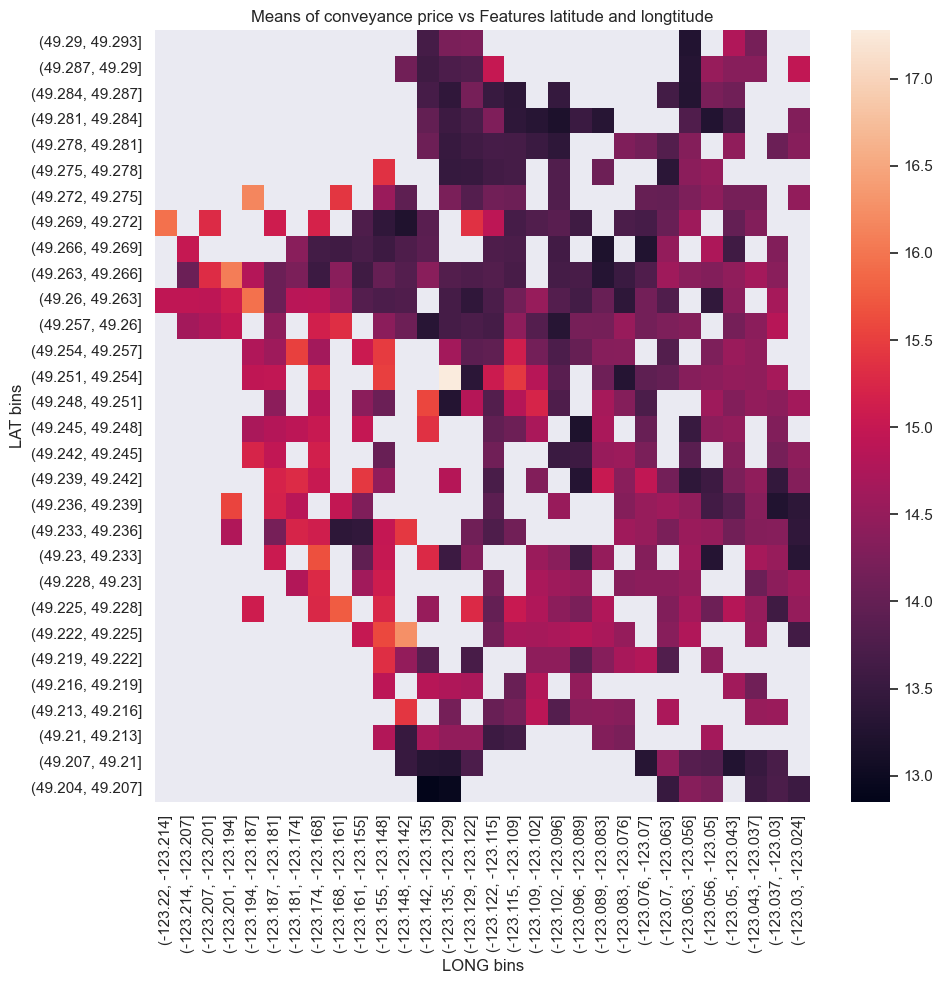

In [19]:
bca = bca[bca['CSDname'].map(lambda x:x.startswith('Vancouver'))]
bca['conveyancePrice'] = bca['conveyancePrice'].apply(np.log)
field = 'conveyancePrice'

means = heatmap_bins(bca, ['LONG', 'LAT'])

with plt.rc_context({'figure.figsize': (10,10)}):
    plt.clf()
    sns.heatmap(means[field]) 
    plt.title('Means of conveyance price vs Features latitude and longtitude')
    plt.tight_layout()
    plt.show()
    

#### 9.c Create one or multiple plots to explore possible relationships between other quantitative variables and conveyancePrice

For this question, please use the entire dataset.

1. Create a plot that shows how `conveyancePrice` relates to two (or more) other quantitative variables. We are hoping to use this plot to think about possible modeling choices for price predictions.

Text(0.5, 1.0, 'Scatter plot of conveyance price and the conveyranceDate')

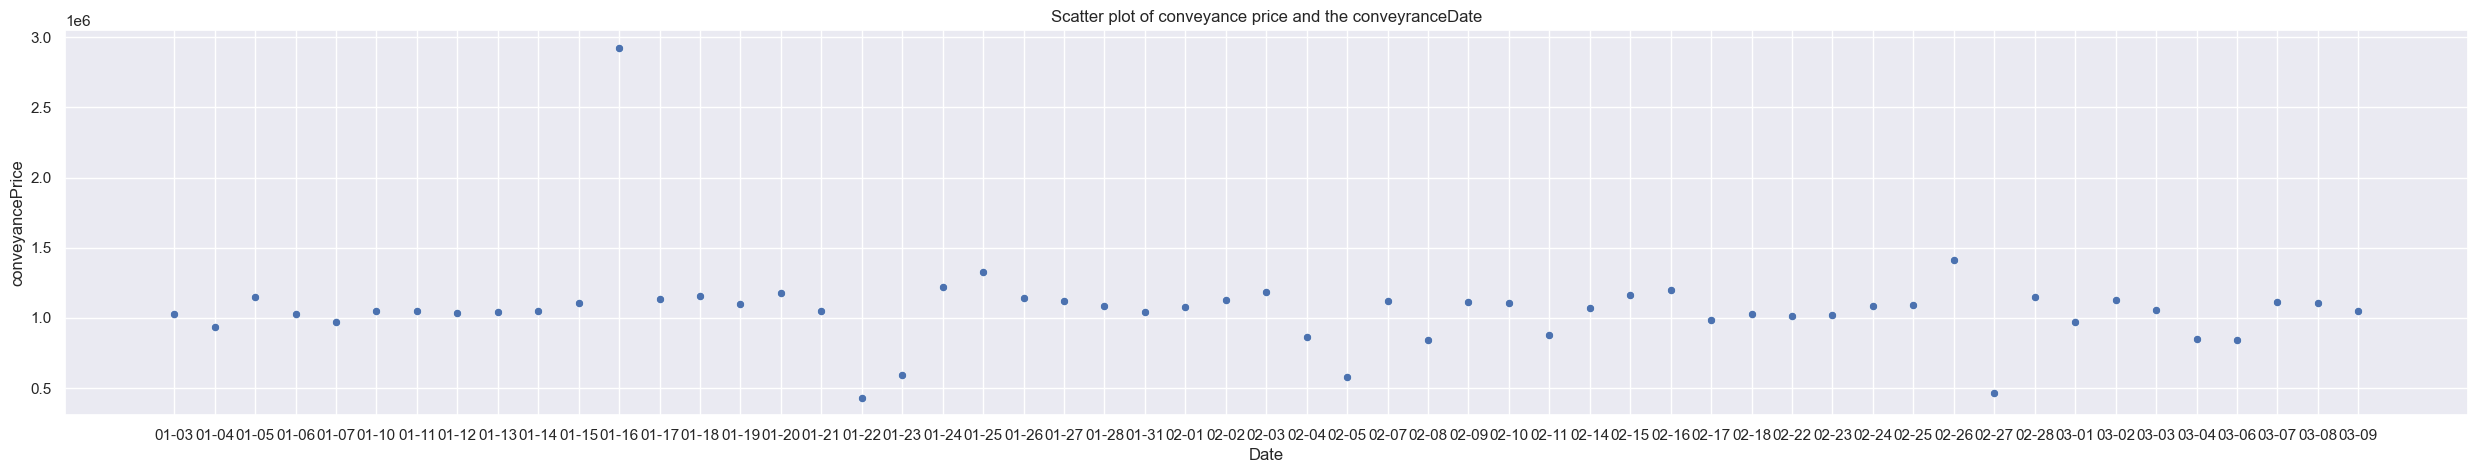

In [20]:
bca = bcadf.merge(pccf_short, left_on='postalCode', right_on='Postal code')

#First plot the relationship between date and the average conveyance price on that day.
price_date = bca.groupby(by = ['conveyanceDate'],as_index=False)['conveyancePrice'].agg('mean')
price_date['conveyanceDate']=pd.to_datetime(price_date['conveyanceDate'],format='%Y/%m/%d')
price_date['Date'] = price_date['conveyanceDate'].apply(lambda x: x.strftime('%m-%d')) 
# price_date
plt.figure(figsize=(31, 5))
ax = sns.scatterplot(data=price_date, x = 'Date', y = 'conveyancePrice')
ax.set_title('Scatter plot of conveyance price and the conveyranceDate')

Text(0.5, 1.0, 'Scatter plot of conveyance price and the first floor area')

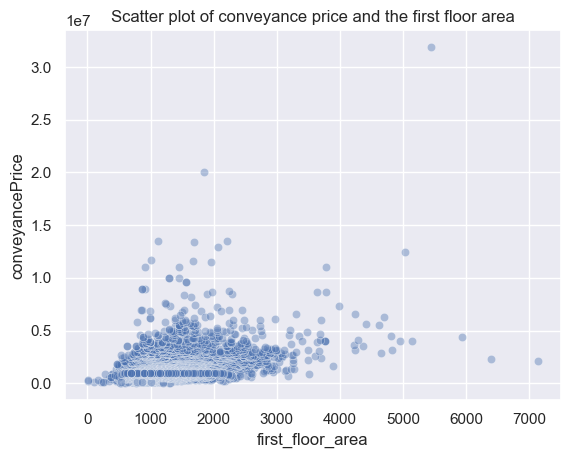

In [21]:
#Second plot the relationship between first floor area and the conveyance price.
ax = sns.scatterplot(data=bca, x = 'first_floor_area', y = 'conveyancePrice',alpha=0.4)
ax.set_title('Scatter plot of conveyance price and the first floor area')

### Optional Task 10: Further exploration (Bonus +0.25%)

If you do want to explore the spatial data of this assignment further, take a look at the material and tutorials of Geoff Boeing's [OSMnx](https://github.com/gboeing/osmnx). It can interface with the open street map API and pull further data, such as amenities, road network, basemap to add as background of a scatter plot, for instance.

In case you decide to work on this and would like to share your result, include a single page (or short) PDF that contains a plot and brief paragraph explaining it. Quality outcomes, we may showcase some of these works in class.

## Submission

You need to complete the first part by filling out this notebook. Please submit <font color="blue">A3.ipynb</font> to the CourSys activity [Assignment 3](https://courses.cs.sfu.ca/2022sp-cmpt-733-g1/+a3/). 